In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
features, true_labels = make_blobs(
    n_samples=1000, centers=5, cluster_std=2.5, random_state=42
)

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
kmeans = KMeans(
    init="random", n_clusters=5, n_init=10, max_iter=300, random_state=42
)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, n_init=10, random_state=42)

In [ ]:
# The lowest SSE value
kmeans.inertia_

286.0703634122099

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.38463815, -0.3240598 ],
       [-0.12258856,  0.98327934],
       [-1.25941159,  0.68003678],
       [ 0.73159121,  0.22999263],
       [-0.75045577, -1.63011678]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

9

In [ ]:
kmeans.labels_[:5]

array([0, 3, 4, 0, 3], dtype=int32)

### How to Choose the Number of Clusters

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

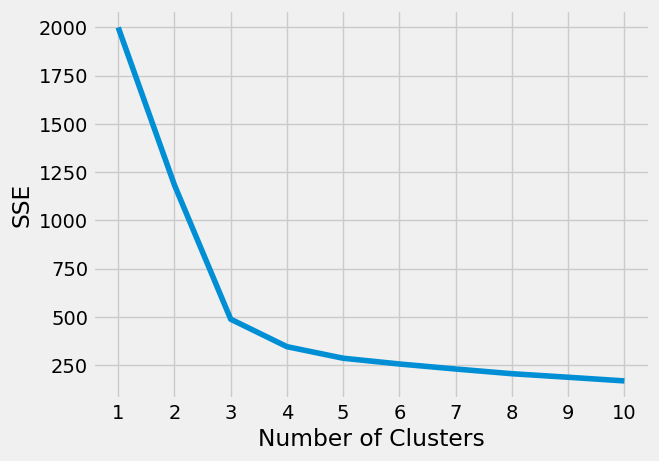

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [ ]:
kl.elbow

3

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

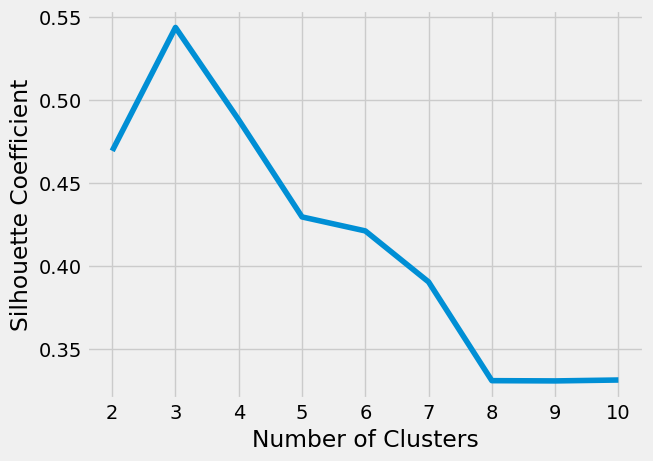

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()